# Trabalho 1 - Snakes and Ladders

Felipe Souza Tanios, RA 155330

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
plays = 200
board_size = 100
dice = 2

mobility_dict = {
        1  :38,
        4  :14,
        9  :31,
        21 :42,
        28 :84,
        36 :44,
        51 :67,
        71 :91,
        80 :100,
        98 :78,
        95 :75,
        93 :73,
        87 :24,
        64 :60,
        62 :19,
        56 :53,
        49 :11,
        48 :26,
        16 :6
}

In [28]:
results = np.zeros((plays, board_size))

for i in range(len(results)):
    for j in range(len(results[i])):
        
        if i == 0:
            if j < dice:
                results[i][j] = 1/dice
        if i > 0:
                results[i][j] += sum((1/dice)*(results[i-1][j-(k+1)]) for k in range(dice) if j - (k+1) >= 0)

                
#         if j+1 in mobility_dict.keys():
#             results[i][mobility_dict[j+1]-1] = results[i][mobility_dict[j+1]-1] + results[i][j]
#             results[i][j] = 0
    

In [29]:
chance_to_win = []
for result in results:
#     print(np.sum(result))
    chance_to_win.append(result[-1])
for i in range(len(chance_to_win)):
    if chance_to_win[i] > 0:
        print(i)
        break

49


In [21]:
for i in range ()

SyntaxError: invalid syntax (<ipython-input-21-ffda330692ed>, line 1)

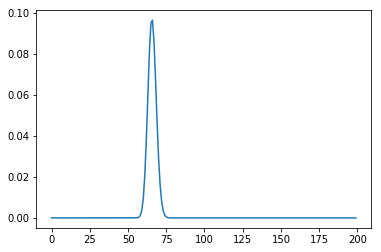

In [23]:
plt.plot(chance_to_win)
plt.show()